In [12]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('./../')
import spineSimulator
from spineSimulator import plot
from spineSimulator.constants import parameter_sets

#from sys import path
#path.append('./../spineSimulator/')
#import plot
#from simulation_parameters import simulation_parameters

#from importlib import reload
#reload(plot)

In [2]:
# text rendering with LaTex
#plt.rc('text', usetex=True)
#plt.rc('font', family='sans')

In [13]:
(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_1')


cum_R = np.cumsum(1./g_ij, axis=1)
const = parameter_sets[param_set]
const


{'const_k_B': 1.381e-23,
 'const_e': 1.602e-19,
 'const_N_A': 6.022e+23,
 'const_z_Na': 1,
 'const_z_K': 1,
 'const_z_Cl': -1,
 'const_z_background': -1,
 'const_D_Na': 6.5e-10,
 'const_D_K': 1e-09,
 'const_D_Cl': 1e-09,
 'const_r_m_Na': 1.0,
 'const_r_m_K': 1.0,
 'const_r_m_Cl': 1.0,
 'const_c_m': 0.01,
 'const_T': 310.0,
 'const_phi_rest': -0.07,
 'const_c_Na_extracell': 145.0,
 'const_c_K_extracell': 5.0,
 'const_c_Cl_extracell': 110.0,
 'const_c_Na_rest': 10.0,
 'const_c_K_rest': 140.0,
 'const_c_Cl_rest': 10.0,
 'const_driving_voltage': 0.1}

In [8]:
np.max(cum_R)

239804603.27282432

# Figure 3
Main resulst.

    Electric current is constant
    current is set by synaptic current
    diffusive and electric currentas are compensating

In [16]:
def ax_diffusive_currents_along_main_axis(fig, pos, t_i):
    ax = fig.add_axes(pos)
    
    x_vals = ( x[1:] + x[:-1] ) / 2. * 1.e9
    
    ax.plot(x_vals,i_c[t_i]*1.e12, 'ko-', label='total', lw=1, ms=1.5,c=colors[3])
    ax.plot(x_vals,i_c_Na[t_i]*1.e12, 'ro-', label='sodium', lw=1, ms=1.5,c=colors[0])
    ax.plot(x_vals,i_c_K[t_i]*1.e12, 'go-', label='potassium', lw=1, ms=1.5,c=colors[1])
    ax.plot(x_vals,i_c_Cl[t_i]*1.e12, 'bo-', label='chloride', lw=1, ms=1.5,c=colors[2])
    
    ax.set_xlabel('Main axis (x) [nm]', fontsize=8)
    ax.set_ylabel('Diffusion \ncurrent [pA]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim((-30,38))
    ax.set_yticks((-25,0,25))
    
    #ax.legend()
    #ax.set_title('Diffusive currents', fontsize=8)

def ax_electric_currents_along_main_axis(fig, pos, t_i):
    ax = fig.add_axes(pos)
    
    
    x_vals = ( x[1:] + x[:-1] ) / 2. * 1.e9
    ax.plot(x_vals,i_e[t_i]*1.e12, 'ko-', label='total', lw=1, ms=1.5,c=colors[4])
    ax.plot(x_vals,i_e_Na[t_i]*1.e12, 'ro-', label='sodium', lw=1, ms=1.5,c=colors[0])
    ax.plot(x_vals,i_e_K[t_i]*1.e12, 'go-', label='potassium', lw=1, ms=1.5,c=colors[1])
    ax.plot(x_vals,i_e_Cl[t_i]*1.e12, 'bo-', label='chloride', lw=1, ms=1.5,c=colors[2])
    
    ax.set_xlabel('Main axis (x) [nm]', fontsize=8)
    ax.set_ylabel('Drift \ncurrent [pA]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim((-30,38))
    ax.set_yticks((-25,0,25))

    
    #ax.set_title('Electric currents', fontsize=8)
    #ax.legend()

def ax_absolute_currents_along_main_axis(fig, pos, t_i):
    ax = fig.add_axes(pos)
    
    x_vals = ( x[1:] + x[:-1] ) / 2. * 1.e9
    ax.plot(x_vals,i_total[t_i]*1.e12, 'ko-', label='total', lw=1, ms=1.5,c=colors[5])
    #ax.plot(x_vals,i_e[t_i]*1.e12, 'b--', label='electric', lw=1, ms=1.5)
    #ax.plot(x_vals,i_c[t_i]*1.e12, 'g--', label='diffusive', lw=1, ms=1.5)
    ax.plot(x_vals,(i_c_Na+i_e_Na)[t_i]*1.e12, 'yo-', label='sodium', lw=1, ms=1.5,c=colors[0])
    ax.plot(x_vals,(i_c_K+i_e_K)[t_i]*1.e12, 'ro-', label='potassium', lw=1, ms=1.5,c=colors[1])
    ax.plot(x_vals,(i_c_Cl+i_e_Cl)[t_i]*1.e12, 'ro-', label='chloride', lw=1, ms=1.5,c=colors[2])
    
    ax.set_xlabel('Main axis (x) [nm]', fontsize=8)
    ax.set_ylabel('Summed drift and\n diffusion current [pA]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim((-30,38))
    ax.set_yticks((-25,0,25))

    #ax.set_title('Absolute currents', fontsize=8)
    #ax.legend()
    
########################
    
def ax_diffusive_currents_over_time(fig, pos, z_i):
    ax = fig.add_axes(pos)
    
    ax.plot(t*1.e3,i_c[:, z_i]*1.e12, 'k-', label='total', lw=1,c=colors[3])
    ax.plot(t*1.e3,i_c_Na[:, z_i]*1.e12, 'r-', label='sodium', lw=1,c=colors[0])
    ax.plot(t*1.e3,i_c_K[:, z_i]*1.e12, 'g-', label='potassium', lw=1,c=colors[1])
    ax.plot(t*1.e3,i_c_Cl[:, z_i]*1.e12, 'b-', label='chloride', lw=1,c=colors[2])
    
    ax.set_xlabel('Time [ms]', fontsize=8)
    ax.set_ylabel('Neck diffusion \ncurrent [pA]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim((-30,38))
    ax.set_yticks((-25,0,25))

    
    #ax.legend()
    #ax.set_title('diffusive currents')
    
def ax_electric_currents_over_time(fig, pos, z_i):
    ax = fig.add_axes(pos)
    
    ax.plot(t*1.e3,i_e[:, z_i]*1.e12, 'k-', label='total', lw=1,c=colors[4])
    ax.plot(t*1.e3,i_e_Na[:, z_i]*1.e12, 'r-', label='sodium', lw=1,c=colors[0])
    ax.plot(t*1.e3,i_e_K[:, z_i]*1.e12, 'g-', label='potassium', lw=1,c=colors[1])
    ax.plot(t*1.e3,i_e_Cl[:, z_i]*1.e12, 'b-', label='chloride', lw=1,c=colors[2])
    
    ax.set_xlabel('Time [ms]', fontsize=8)
    ax.set_ylabel('Neck drift \ncurrent [pA]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim((-30,38))
    ax.set_yticks((-25,0,25))
    
    #ax.legend()
    #ax.set_title('electric currents')
    
def ax_absolute_currents_over_time(fig, pos, z_i):
    ax = fig.add_axes(pos)    
    
    #ax.plot(t*1.e3,i_e[:, z_i]*1.e12, 'b-', label='electric', lw=1)
    #ax.plot(t*1.e3,i_c[:, z_i]*1.e12, 'g-', label='diffusive', lw=1)
    ax.plot(t*1.e3,(i_c_Na+i_e_Na)[:, z_i]*1.e12, 'y-', label='sodium', lw=1,c=colors[0])
    ax.plot(t*1.e3,(i_c_K+i_e_K)[:, z_i]*1.e12, 'r-', label='potassium', lw=1,c=colors[1])
    ax.plot(t*1.e3,(i_c_Cl+i_e_Cl)[:, z_i]*1.e12, 'r-',label='chloride', lw=1,c=colors[2])
    ax.plot(t*1.e3,i_total[:, z_i]*1.e12, 'k-', label='total', lw=1,c=colors[5])

    ax.set_xlabel('Time [ms]', fontsize=8)
    ax.set_ylabel('Summed neck drift\n diffusion current [pA]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim((-30,38))
    ax.set_yticks((-25,0,25))
    
########################################
    
def ax_cumulative_resistance(fig, pos):
    ax = fig.add_axes(pos)
    for t_i in [100]:
        ax.plot((x[1:]+x[:-1])/2.*1.e9,cum_R[t_i, :]*1.e-6,'k-', lw=1.)

    ax.set_xlabel('Main axis (x) [nm]', fontsize=8)
    ax.set_ylabel('Cumulative \n resistance [$M\Omega$]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

def as_voltage_current_match(fig, pos, z_i=1):

    # get constants
    D_Na = const['const_D_Na']
    D_Cl = const['const_D_Cl']
    D_K = const['const_D_K']
    V_T = const['const_k_B'] * const['const_T'] / const['const_e']
    c_Na_rest = const['const_c_Na_rest']
    c_K_rest = const['const_c_K_rest']
    c_Cl_rest = const['const_c_Cl_rest']
    
    # goldmann hodgikn katz equation - voltage
    # this can not explain voltage increase!
    ## v_ghk = - V_T * np.log( (D_Na * c_Na[:,i_x] + D_K * c_K[:,i_x] + D_Cl * c_Cl[:,i_x]) / (D_Na * c_Na_rest + D_K * c_K_rest + D_Cl * c_Cl_rest) ) 

    # diffusive current
    v_d = (np.cumsum((i_total - i_c)/g_ij,axis=1))[:,-1]  + phi[0,z_i]

    ax = fig.add_axes(pos)


    ax.plot(t*1.e3, phi[:,z_i]*1.e3, label='Head \ndepol. [mV]', lw=1, color='k') 
    ax.plot(t*1.e3, v_d*1.e3, '--', label='Predicted \ndepol. [mV]', lw=1, color='limegreen')
    
    ax.set_xlabel('Time [ms]', fontsize=8)
    ax.set_ylabel('Head membrane \nvoltage [mV]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim((-70,-60))
    ax.legend(fontsize=6, loc=(0.05, 0.75), frameon=False)
    
def ax_voltage_current_match_all(fig, pos, experiments=[1,11,12]):
    
    ax = fig.add_axes(pos)
    
    
    for i in experiments:
        _id = 'experiment_' + str(i)
        
        (
        x,
        a,
        t,
        phi,
        c_Na,
        c_K,
        c_Cl,
        param_set,
        params,
        dx,
        dt,
        r_Na,
        R_Na,
        g_Na_ij,
        r_K,
        R_K,
        g_K_ij,
        r_Cl,
        R_Cl,
        g_Cl_ij,
        r_e,
        R_e,
        g_ij,
        i_c_Na,
        i_c_K,
        i_c_Cl,
        i_e_Na,
        i_e_K,
        i_e_Cl,
        i_e,
        i_c,
        i_total,
        ) = plot.get_results_summary(_id)

        cum_R = np.cumsum(1./g_ij, axis=1)
        #from constants import parameter_sets
        const = parameter_sets[param_set]
        
         # get constants
        D_Na = const['const_D_Na']
        D_Cl = const['const_D_Cl']
        D_K = const['const_D_K']
        V_T = const['const_k_B'] * const['const_T'] / const['const_e']
        c_Na_rest = const['const_c_Na_rest']
        c_K_rest = const['const_c_K_rest']
        c_Cl_rest = const['const_c_Cl_rest']
    
        # diffusive current effect
        v_d = (np.cumsum((i_total - i_c)/g_ij,axis=1))[:,-1]  + phi[0,0]
        
        ax.plot(np.max(phi[:,1])*1.e3, np.max(v_d)*1.e3, 'kx', ms=2) 
        
    ax.plot([-70, -40],[-70,-40], lw=1., color='grey', zorder=-10)
    
    ax.set_xlabel('Max. head \ndepolarisation [mV]', fontsize=8)
    ax.set_ylabel('Max. predicted \ndepolarization [mV]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    


/tmp/ipykernel_20122/2960742195.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x_vals,i_c[t_i]*1.e12, 'ko-', label='total', lw=1, ms=1.5,c=colors[3])
/tmp/ipykernel_20122/2960742195.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_vals,i_c_Na[t_i]*1.e12, 'ro-', label='sodium', lw=1, ms=1.5,c=colors[0])
/tmp/ipykernel_20122/2960742195.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  ax.plot(x_vals,i_c_K[t_i]*1.e12, 'go-', label='potassium', lw=1, ms=1.5,c=colors[1])
/tmp/ipykernel_20122/2960742195.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The ke

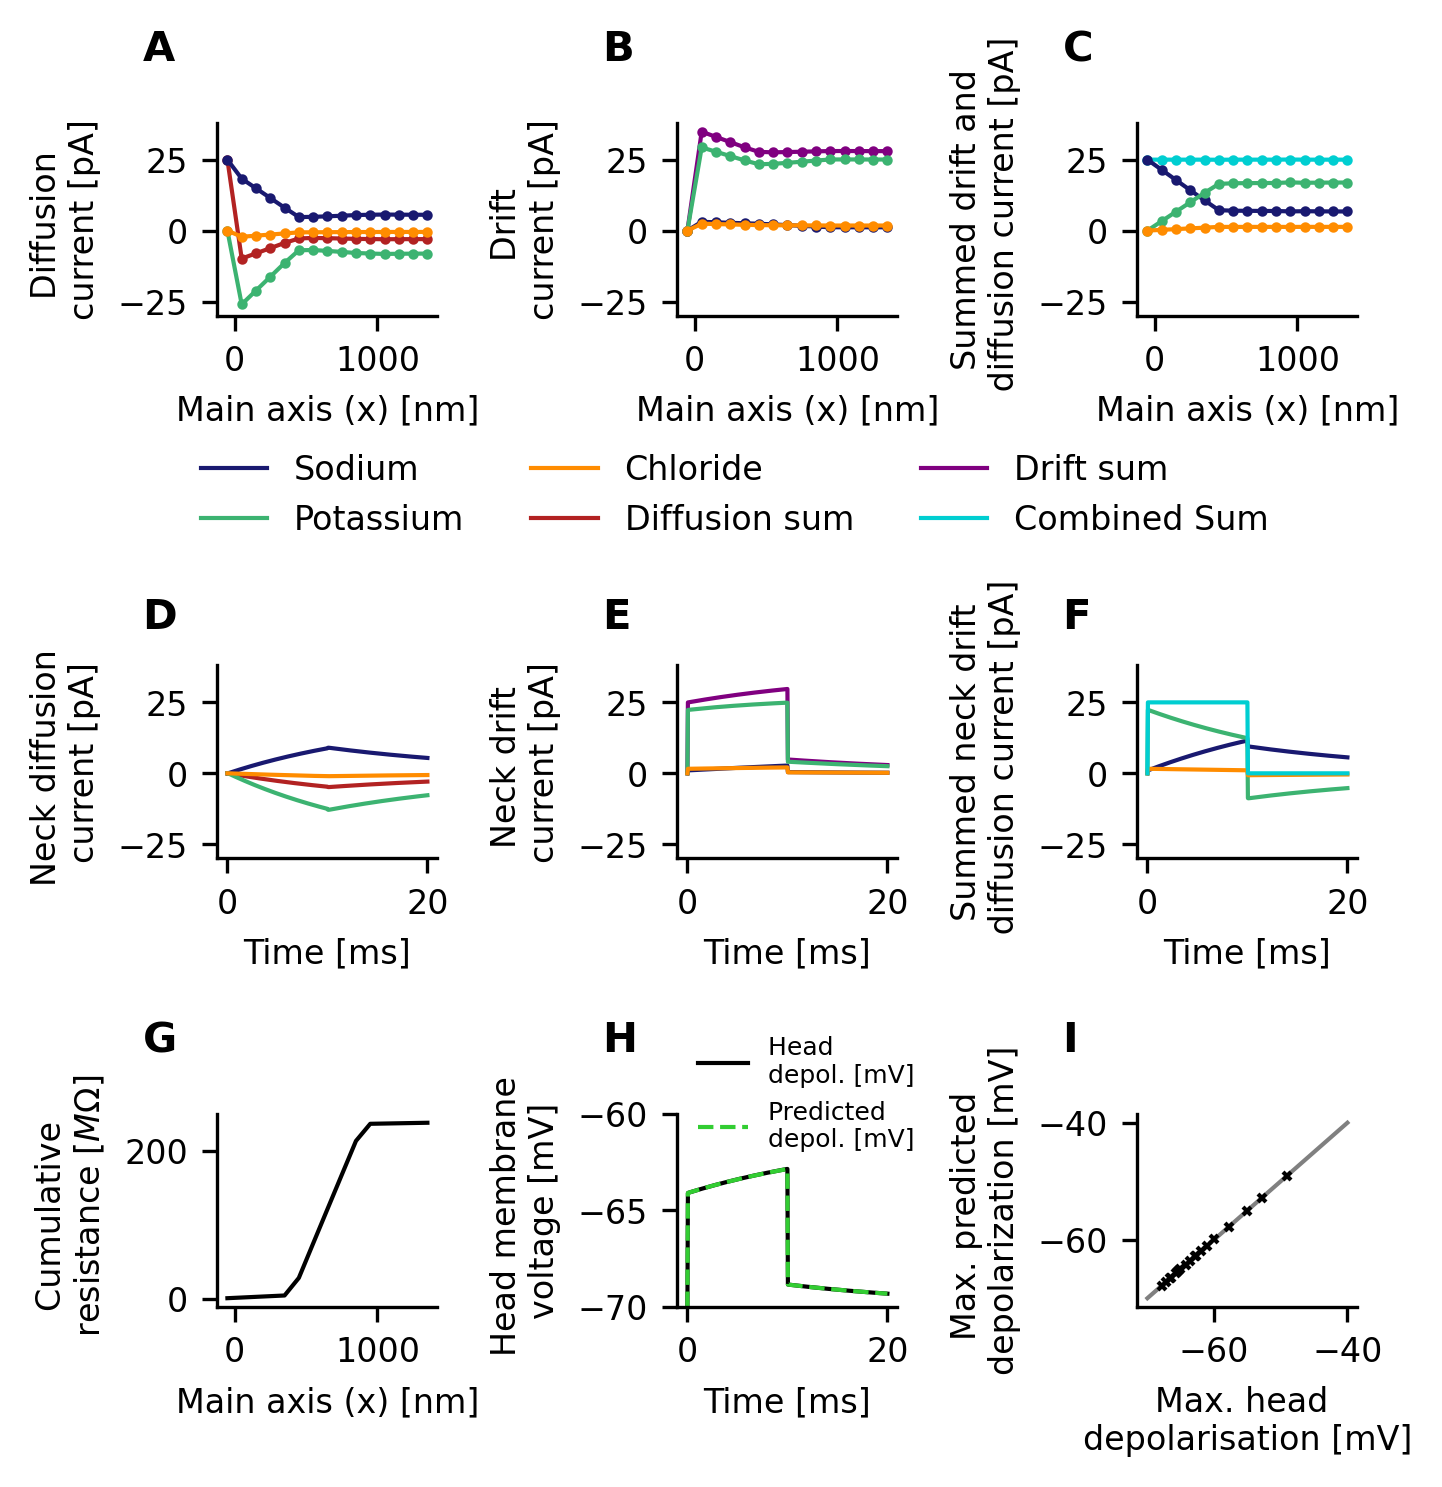

In [17]:
colors = ['midnightblue','mediumseagreen', 'darkorange', 'firebrick', 'purple', 'darkturquoise']
n_columns = 3
n_rows = 3

# all in unit inch
leg_h = 0.7 # legend width
fig_width = 5.0
fig_height = fig_width + leg_h
dx = 0.8
dy = dx
wx = (fig_width - n_columns * dx - 0.5 * dx) / n_columns
wy = (fig_height  - n_rows * dy - 0.5 * dy - leg_h) / n_rows



# relativie coords 
x_min = [(dx + n*(wx+dx))/fig_width for n in range(n_columns) ]
y_min = [dy/fig_height,
         (2*dy+wy)/fig_height+0.03,
         (3*dy+2*wy+leg_h)/fig_height]
wx_r = wx/fig_width
wy_r = wy/fig_height

pos1 = [x_min[0], y_min[2], wx_r, wy_r]
pos2 = [x_min[1], y_min[2], wx_r, wy_r]
pos3 = [x_min[2], y_min[2], wx_r, wy_r]
pos4 = [x_min[0], y_min[1], wx_r, wy_r]
pos5 = [x_min[1], y_min[1], wx_r, wy_r]
pos6 = [x_min[2], y_min[1], wx_r, wy_r]
pos7 = [x_min[0], y_min[0], wx_r, wy_r]
pos8 = [x_min[1], y_min[0], wx_r, wy_r]
pos9 = [x_min[2], y_min[0], wx_r, wy_r]

fig = plt.figure(dpi=300, figsize=(5,5))

t_i = 100
ax_diffusive_currents_along_main_axis(fig = fig,  pos=pos1, t_i=t_i)
ax_electric_currents_along_main_axis( fig = fig,  pos=pos2, t_i=t_i)
ax_absolute_currents_along_main_axis( fig = fig,  pos=pos3, t_i=t_i)
ax_diffusive_currents_over_time(fig = fig,         pos=pos4, z_i=7)
ax_electric_currents_over_time(fig = fig,         pos=pos5, z_i=7)
ax_absolute_currents_over_time(fig = fig,         pos=pos6, z_i=7)
ax_cumulative_resistance(fig = fig, pos = pos7)
as_voltage_current_match(fig = fig, pos = pos8)
ax_voltage_current_match_all(fig, pos9, experiments=(1,11,12,28,29,30,16,17,18,19,20,21,31,32,33,25,26,27))

from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color=colors[0], lw=1),
    Line2D([0], [0], color=colors[1], lw=1),
    Line2D([0], [0], color=colors[2], lw=1),
    Line2D([0], [0], color=colors[3], lw=1),
    Line2D([0], [0], color=colors[4], lw=1),
    Line2D([0], [0], color=colors[5], lw=1),
               ]


fig.legend(custom_lines, ['Sodium', 'Potassium', 'Chloride', 'Diffusion sum', 'Drift sum', 'Combined Sum'], loc=(0.13, 0.63), fontsize=8, ncol=3, frameon=False)

dtx=-0.05
dty=0.17

fig.text(pos1[0]+dtx, pos1[1]+dty, 'A', fontsize=10, weight='bold')
fig.text(pos2[0]+dtx, pos2[1]+dty, 'B', fontsize=10, weight='bold')
fig.text(pos3[0]+dtx, pos3[1]+dty, 'C', fontsize=10, weight='bold')
fig.text(pos4[0]+dtx, pos4[1]+dty*.9, 'D', fontsize=10, weight='bold')
fig.text(pos5[0]+dtx, pos5[1]+dty*.9, 'E', fontsize=10, weight='bold')
fig.text(pos6[0]+dtx, pos6[1]+dty*.9, 'F', fontsize=10, weight='bold')
fig.text(pos7[0]+dtx, pos7[1]+dty, 'G', fontsize=10, weight='bold')
fig.text(pos8[0]+dtx, pos8[1]+dty, 'H', fontsize=10, weight='bold')
fig.text(pos9[0]+dtx, pos9[1]+dty, 'I', fontsize=10, weight='bold')

plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure03.eps')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure03.png')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure03.tif')

plt.show()

# Figure 3
    A) Diffusive currents along spatial main axis after 10 ms of spine 1 of Fig 2 for 25pA input current. Diffusive currents are cumpted as $D_i dc_i/dx$
    B) Electric currents along spatial main axis after 10 ms of spine 1 of Fig 2 for 25pA input current. Electric currents are cumpted as $r_e dPhi/dx$
    C) Summed currents along main axis after 10 ms of spine 1 of Fig 2 for 25pA input current.
    D) Diffusive currents through spine neck.
    E) Electric currents through spine neck.
    F) Summed currents through spine neck.
    G) cumulative resistance along main axis after 10 ms of spine 1 of Fig 2 for 25pA input current. $\int_0^L \dx 1/g(x)$
    H) $\int_0^L \dx (i_c(x)+i_total)/g(x)$ matches voltage. Diffusive ion-currents increase membrane voltage in spines
    I) x-axis: V_max for all spines in Fig 2, y-axis: max of $\int_0^L \dx (i_c(x)+i_total)/g(x)$ for all spines in Fig 2

